In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
def histoplot(df, dfvar, num_bins = 10, range=None, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, range, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()
    fig.tight_layout()
    plt.show()

In [4]:
def plot_energy(df, num_bins = 20, xmin=2e+4, xmax=4e+4, figsize=(6, 4), title=""):
    energies = df.groupby("event").sum().amplitude.values
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(energies, num_bins, (xmin, xmax))
    ax0.set_xlabel("Event energy")
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    

    fig.tight_layout()
    plt.show()

In [5]:
def plot_time(df, num_bins = 20, xmin=0.0, xmax=5e+3, timebin=200, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df.time * timebin, num_bins, (xmin, xmax), weights=df.charge)
    ax0.set_xlabel("Event Time")
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    
    fig.tight_layout()
    plt.show()

In [6]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [7]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

In [8]:
def read_histograms(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    histograms = {}
    current_histogram = None
    bin_edges = []
    bin_values = []

    for line in lines:
        if line.startswith("# Histogram:"):
            if current_histogram:
                histograms[current_histogram] = (bin_edges, bin_values)
            current_histogram = line.split(":")[1].strip()
            bin_edges = []
            bin_values = []
        elif current_histogram and line.strip():
            parts = line.split()
            bin_edges.append(float(parts[0]))
            bin_edges.append(float(parts[1]))
            bin_values.append(float(parts[2]))
    
    if current_histogram:
        histograms[current_histogram] = (bin_edges, bin_values)

    return histograms


In [9]:
def plot_histogram(histograms, name, figsize=(6, 6)):
    edges, values = histograms[name]
    bin_edges = edges[::2]  # taking only the lower edges
    bin_width = edges[1] - edges[0]  # assuming uniform bin width
    
    plt.figure(figsize=figsize)    
    plt.bar(bin_edges, values, width=bin_width, align='edge')
    plt.title(f"Histogram: {name}")
    plt.xlabel("Bin")
    plt.ylabel("Count")
    plt.show()


In [10]:
def collect_images(df, n= 8):
    events = np.unique(df['event'])
    images = np.zeros((events.shape[0],n,n))
    gevt = df.groupby('event')
    i=0
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        for _, row in group.iterrows():
            sensor_id = row['sensor_id']
            charge = row['amplitude']
            charge_matrix[sensor_id // n, sensor_id % n] = charge
        images[i]= charge_matrix
        i+=1
    return images

## Sensor data
- Contains a vector of times and chage

In [28]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalMT/csiGammasZRTest"
filenm = "sensor_data_1.csv"


In [29]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0)
df

,event,sensor_id,time,charge
0,300,2,0,80
1,300,2,1,78
2,300,2,2,58
3,300,2,3,45
4,300,2,4,25
...,...,...,...,...
13684484,9999,22,15,2
13684485,9999,22,16,2
13684486,9999,22,17,1
13684487,9999,22,18,2


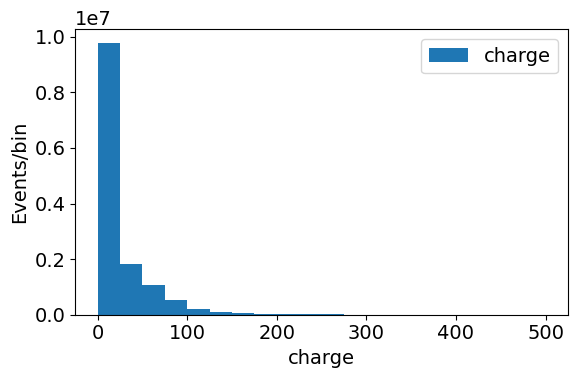

In [30]:
histoplot(df, "charge", num_bins = 20, range=(0,500), figsize=(6, 4), title="")

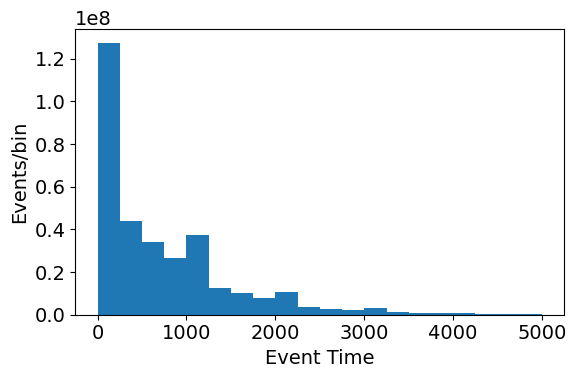

In [31]:
plot_time(df, num_bins = 20, xmin=0.0, xmax=5e+3, timebin=200, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [32]:
filenm = "isensor_data_1.csv"
df = pd.read_csv(f"{rootdir}/{filenm}", header=0)

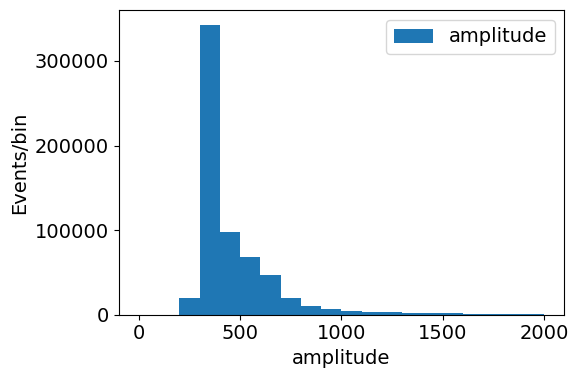

In [33]:
histoplot(df, "amplitude", num_bins = 20, range=(0,2000), figsize=(6, 4), title="")

## Plot control histograms

In [34]:
histodir = "/Users/jjgomezcadenas/Data/G4Prods/crystalMT/csiGammasZRTest"
filenm = "control_histograms_1.txt"
histograms = read_histograms(f"{histodir}/{filenm}")

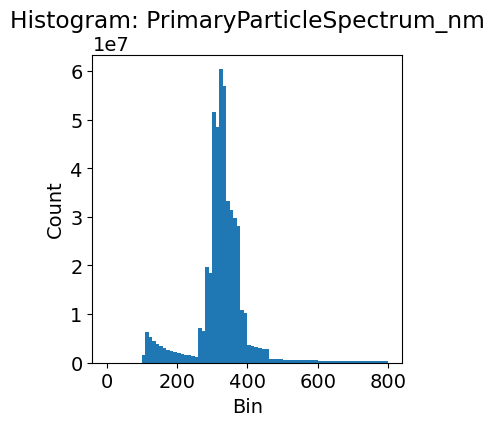

In [35]:
plot_histogram(histograms, "PrimaryParticleSpectrum_nm", figsize=(4, 4))

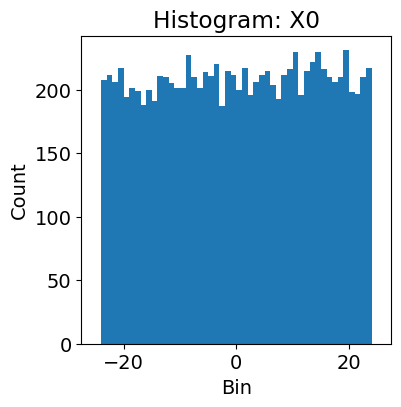

In [36]:
plot_histogram(histograms, "X0", figsize=(4, 4))

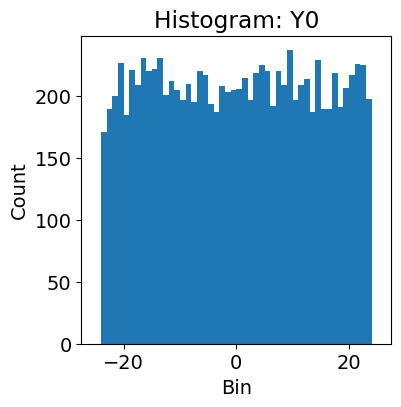

In [37]:
plot_histogram(histograms, "Y0", figsize=(4, 4))

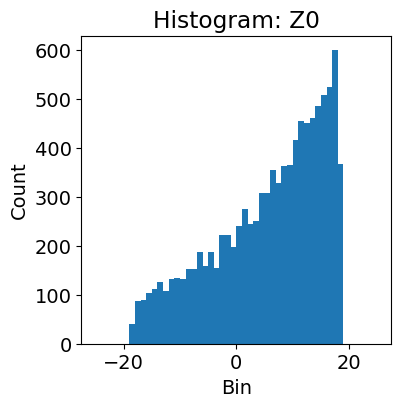

In [38]:
plot_histogram(histograms, "Z0", figsize=(4, 4))

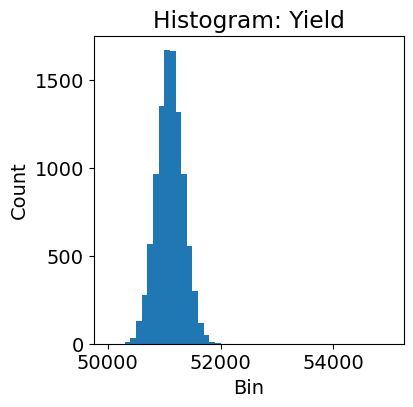

In [39]:
plot_histogram(histograms, "Yield", figsize=(4, 4))

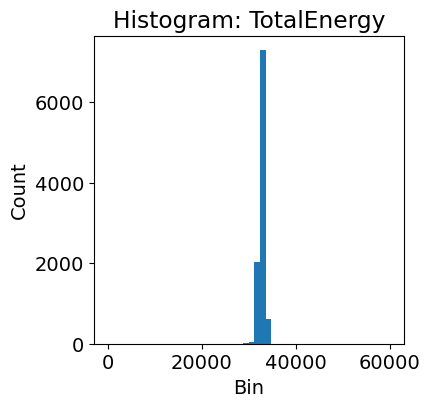

In [40]:
plot_histogram(histograms, "TotalEnergy", figsize=(4, 4))

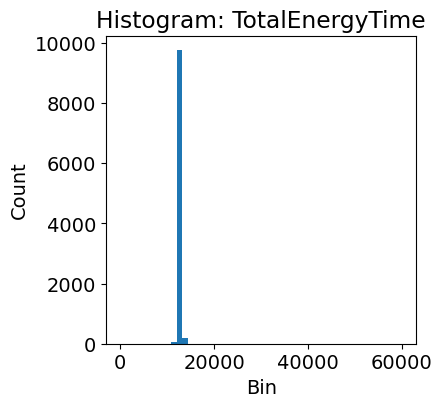

In [41]:
plot_histogram(histograms, "TotalEnergyTime", figsize=(4, 4))

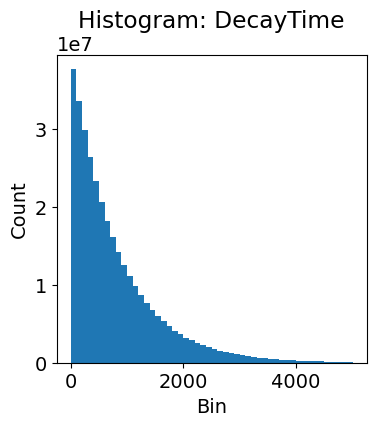

In [42]:
plot_histogram(histograms, "DecayTime", figsize=(4, 4))

### Plot a few events

In [43]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [44]:
charge_matrix

array([[ 312.,  359.,  343.,  377.,  363.,  356.,  334.,  309.],
       [ 354.,  350.,  423.,  373.,  376.,  359.,  309.,  351.],
       [ 328.,  346.,  379.,  377.,  388.,  345.,  361.,  355.],
       [ 366.,  404.,  405.,  426.,  402.,  383.,  364.,  355.],
       [ 348.,  398.,  453.,  490.,  407.,  360.,  367.,  358.],
       [ 440.,  622.,  809.,  781.,  558.,  400.,  377.,  336.],
       [ 597.,  977., 1343., 1311.,  867.,  486.,  318.,  324.],
       [ 586., 1047., 1605., 1600.,  970.,  476.,  317.,  310.]])

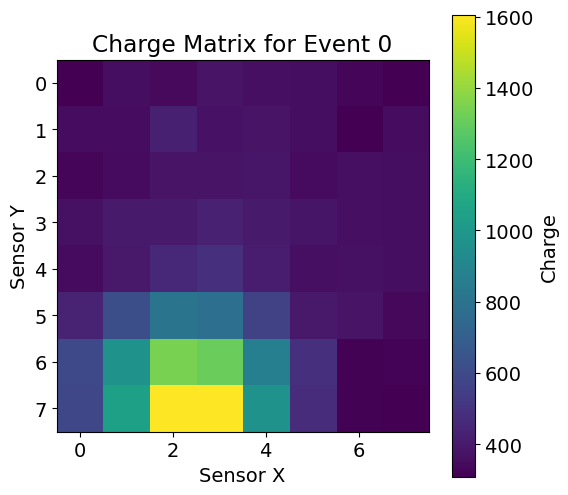

In [45]:
plot_image(charge_matrix)

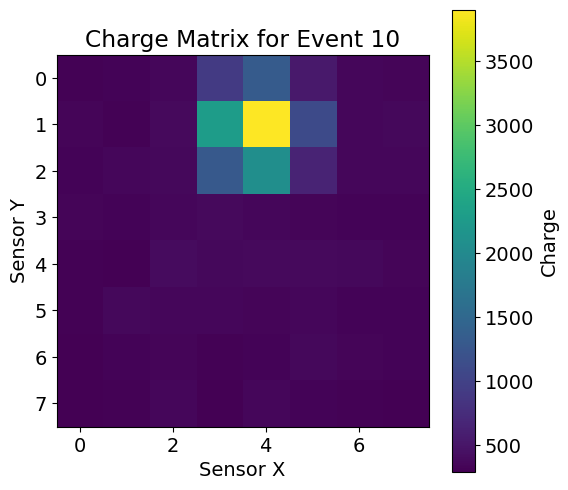

In [46]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

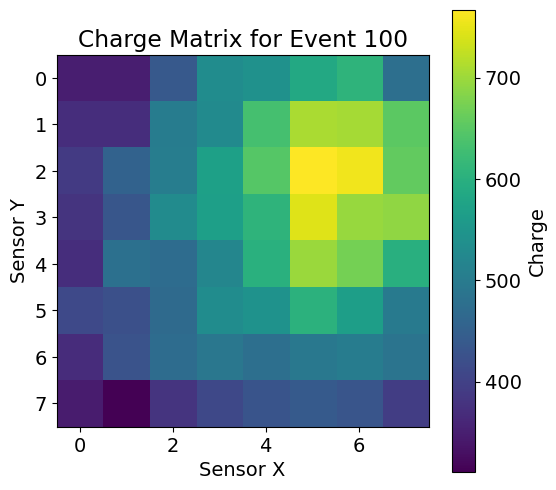

In [47]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

In [48]:
images = collect_images(df)

In [49]:
images.shape

(10000, 8, 8)

In [86]:
#np.save('images_1.npy', images)

In [87]:
#images = np.load('images_1.npy')

In [88]:
#images.shape

(1000, 8, 8)

In [50]:
images

array([[[ 312.,  359.,  343., ...,  356.,  334.,  309.],
        [ 354.,  350.,  423., ...,  359.,  309.,  351.],
        [ 328.,  346.,  379., ...,  345.,  361.,  355.],
        ...,
        [ 440.,  622.,  809., ...,  400.,  377.,  336.],
        [ 597.,  977., 1343., ...,  486.,  318.,  324.],
        [ 586., 1047., 1605., ...,  476.,  317.,  310.]],

       [[ 847.,  726.,  407., ...,  336.,  312.,  324.],
        [1995., 1387.,  613., ...,  351.,  333.,  297.],
        [2635., 1761.,  756., ...,  355.,  405.,  347.],
        ...,
        [ 328.,  348.,  402., ...,  342.,  329.,  320.],
        [ 282.,  333.,  353., ...,  351.,  355.,  346.],
        [ 274.,  324.,  327., ...,  353.,  310.,  279.]],

       [[ 405.,  437.,  466., ...,  401.,  360.,  298.],
        [ 408.,  477.,  494., ...,  461.,  395.,  347.],
        [ 423.,  529.,  524., ...,  504.,  465.,  357.],
        ...,
        [ 645.,  684.,  661., ...,  626.,  486.,  447.],
        [ 578.,  646.,  634., ...,  520.,  46